# [CDAF] Atividade 3

## Nome: Thiago Pádua de Carvalho

## Matrícula: 2020007066

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotsoccer
import numpy as np
import socceraction.spadl

from mplsoccer import Pitch, Sbopen
from scipy import ndimage
from copy import deepcopy

O jogo escolhido é entre Liverpool e Manchester City pela Premier League 2017/2018, ocorrido em 14/01/2018.

In [2]:
matches_england = pd.read_json('../data/matches/matches_England.json')
liv_city_df = matches_england[(matches_england['label'] == 'Liverpool - Manchester City, 4 - 3')]
liv_city_id = liv_city_df.iloc[0]['wyId']
liv_city_id

2499943

In [3]:
events_england = pd.read_json('../data/events/events_England.json')
liv_city_events = deepcopy(events_england[(events_england['matchId'] == liv_city_id)])

In [4]:
correct_columns = {'eventId':'type_id', 'subEventName':'subtype_name', 'playerId':'player_id',
              'matchId':'game_id', 'eventName':'type_name', 'teamId':'team_id',
              'eventSec':'milliseconds', 'subEventId':'subtype_id', 'id':'event_id'
              }

liv_city_events.rename(columns=correct_columns, inplace=True)
liv_city_events['period_id'] = pd.factorize(liv_city_events['matchPeriod'])[0]+1
liv_city_events['milliseconds'] *= 1000 # convert to milliseconds
liv_city_events

,type_id,subtype_name,tags,player_id,positions,game_id,type_name,team_id,matchPeriod,milliseconds,subtype_id,event_id,period_id
378660,8,Simple pass,[{'id': 1801}],15808,"[{'y': 49, 'x': 49}, {'y': 41, 'x': 31}]",2499943,Pass,1612,1H,2528.085,85,220933014,1
378661,8,Simple pass,[{'id': 1801}],25393,"[{'y': 41, 'x': 31}, {'y': 70, 'x': 34}]",2499943,Pass,1612,1H,6517.082,85,220933015,1
378662,8,Simple pass,[{'id': 1801}],14870,"[{'y': 70, 'x': 34}, {'y': 41, 'x': 28}]",2499943,Pass,1612,1H,10732.865,85,220933016,1
378663,8,Simple pass,[{'id': 1801}],25393,"[{'y': 41, 'x': 28}, {'y': 50, 'x': 7}]",2499943,Pass,1612,1H,14110.714,85,220933017,1
378664,8,Launch,[{'id': 1802}],15175,"[{'y': 50, 'x': 7}, {'y': 9, 'x': 61}]",2499943,Pass,1612,1H,16587.550,84,220933018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380531,3,Free Kick,[{'id': 1801}],15175,"[{'y': 42, 'x': 10}, {'y': 48, 'x': 67}]",2499943,Free Kick,1612,2H,2983986.610,31,220934883,2
380532,1,Air duel,"[{'id': 701}, {'id': 1802}]",15808,"[{'y': 48, 'x': 67}, {'y': 35, 'x': 73}]",2499943,Duel,1612,2H,2988693.400,10,220934885,2
380533,1,Air duel,"[{'id': 703}, {'id': 1801}]",105339,"[{'y': 52, 'x': 33}, {'y': 65, 'x': 27}]",2499943,Duel,1625,2H,2988734.839,10,220934931,2
380534,8,Launch,[{'id': 1802}],9380,"[{'y': 65, 'x': 27}, {'y': 55, 'x': 46}]",2499943,Pass,1625,2H,2990658.798,84,220934933,2


In [5]:
liv_city_spadl = socceraction.spadl.wyscout.convert_to_actions(liv_city_events, 1612)
liv_city_spadl

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,0,1,0
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,0,0,1,1
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,0,0,1,2
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,0,0,1,3
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2499943,2,2873.344410,1612,8319,23.10,58.48,23.10,58.48,220934874,0,8,1,1406
1407,2499943,2,2948.558595,1625,38021,23.10,64.60,10.50,44.20,220934929,0,3,0,1407
1408,2499943,2,2983.986610,1612,15175,10.50,39.44,70.35,35.36,220934883,0,4,1,1408
1409,2499943,2,2990.658798,1625,9380,76.65,44.20,56.70,37.40,220934933,0,0,0,1409


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [6]:
typename = socceraction.spadl.actiontypes_df()
bodyparts = socceraction.spadl.bodyparts_df()
results = socceraction.spadl.results_df()
merged = pd.merge(liv_city_spadl, typename, on='type_id')
merged1 = pd.merge(merged, bodyparts, on='bodypart_id')
final_match_events = pd.merge(merged1, results, on='result_id')
final_match_events = final_match_events.drop(['type_id', 'bodypart_id', 'result_id'], axis=1)
final_match_events = final_match_events.rename(columns={'type_name': 'type', 'bodypart_name':'bodypart', 'result_name':'result'})

In [7]:
# sort dataframe by period id and time when the event happened
final_match_events = final_match_events.sort_values(by=['period_id', 'time_seconds'])
final_match_events.reset_index(drop=True, inplace=True)
final_match_events

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,pass,foot,success
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,1,pass,foot,success
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,2,pass,foot,success
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,3,pass,foot,success
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,4,pass,foot,offside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2499943,2,2873.344410,1612,8319,23.10,58.48,23.10,58.48,220934874,1406,foul,foot,success
1407,2499943,2,2948.558595,1625,38021,23.10,64.60,10.50,44.20,220934929,1407,freekick_crossed,foot,fail
1408,2499943,2,2983.986610,1612,15175,10.50,39.44,70.35,35.36,220934883,1408,freekick_short,foot,success
1409,2499943,2,2990.658798,1625,9380,76.65,44.20,56.70,37.40,220934933,1409,pass,foot,fail


In [8]:
# finding succesful shots (goals)
display(final_match_events[(final_match_events['type'] == 'shot') & (final_match_events['result'] == 'success')])

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
163,2499943,1,528.586171,1612,7868,85.05,21.76,105.0,37.4,220933208,163,shot,foot,success
638,2499943,1,2403.544100,1625,245364,6.30,19.72,0.0,30.6,220933931,638,shot,foot,success
958,2499943,2,836.718735,1612,15808,93.45,44.88,105.0,30.6,220934280,958,shot,foot,success
978,2499943,2,963.928509,1612,25747,91.35,43.52,105.0,37.4,220934313,978,shot,foot,success
1055,2499943,2,1323.837327,1612,120353,70.35,44.88,105.0,34.0,220934410,1055,shot,foot,success
1283,2499943,2,2292.703245,1625,265673,7.35,43.52,0.0,37.4,220934795,1283,shot,foot,success
1390,2499943,2,2757.268603,1625,14808,10.50,40.12,0.0,37.4,220934911,1390,shot,foot,success


In [9]:
# As ações serão compostas pelo último gol e os 5 eventos anteriores
actions = final_match_events.iloc[1385:1391]
actions

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
1385,2499943,2,2744.451856,1625,8277,49.35,59.16,30.45,40.12,220934907,1385,pass,foot,success
1386,2499943,2,2748.857070,1612,25393,30.45,40.12,22.05,24.48,220934824,1386,tackle,foot,fail
1387,2499943,2,2752.105113,1625,245364,22.05,24.48,12.60,17.00,220934909,1387,pass,foot,success
1388,2499943,2,2753.623961,1625,8325,12.60,17.00,9.45,17.00,NaN,1388,dribble,foot,success
1389,2499943,2,2755.142809,1625,8325,9.45,17.00,10.50,40.12,220934910,1389,cross,foot,success
1390,2499943,2,2757.268603,1625,14808,10.50,40.12,0.00,37.40,220934911,1390,shot,foot,success


In [10]:
players = pd.read_json('../data/players.json')
teams = pd.read_json('../data/teams.json')

In [11]:
def find_names(actions: pd.DataFrame, df: pd.DataFrame, columns: list):
    names_list = []
    for name in actions[columns[0]]:
        names_list.append(df[df['wyId'] == name][columns[1]].values[0])
    return pd.DataFrame(names_list)

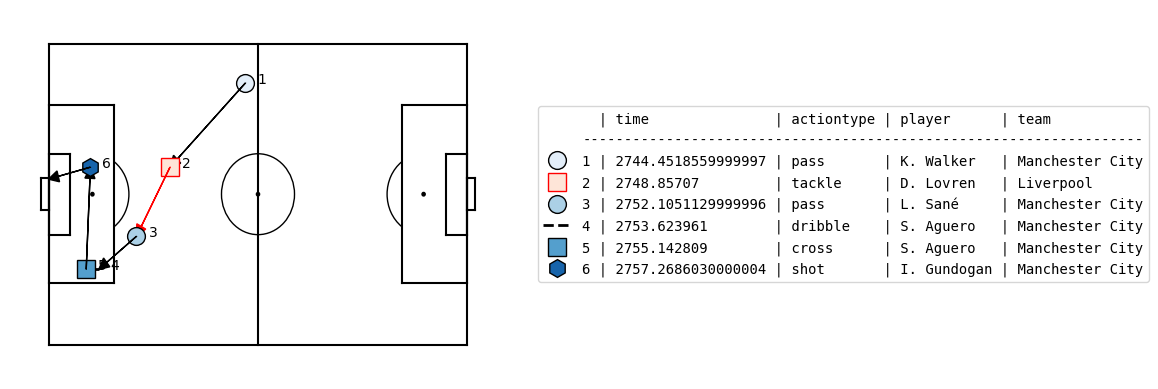

In [12]:
matplotsoccer.actions(
    location=actions[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions.type,
    team=actions.team_id,
    result= actions.result == "success",
    label=pd.concat([actions[["time_seconds","type"]].reset_index(drop=True),
                    find_names(actions, players, ['player_id', 'shortName']),
                    find_names(actions, teams, ['team_id', 'name'])], axis=1),
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

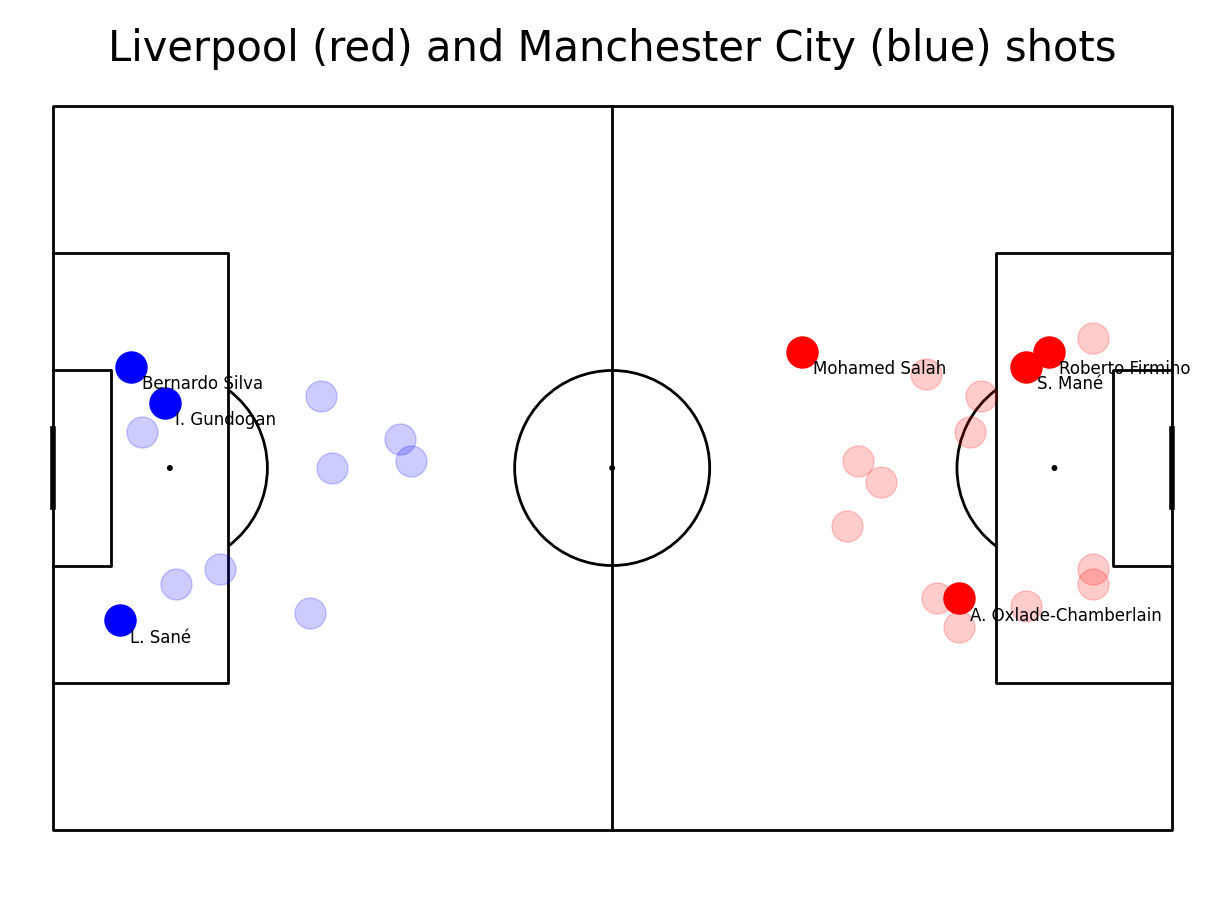

In [13]:
def plot_shots(df: pd.DataFrame, team1: int, team2: int):   
   #create pitch
   pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68)
   fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
   #query
   mask_liverpool = df.loc[(df['type'] == 'shot') & (df['team_id'] == team1)]
   #finding rows in the df and keeping only necessary columns
   df_liverpool = mask_liverpool.loc[:, ['start_x', 'start_y', 'result', 'type', 'player_id']]

   #plot them - if shot ended with Goal - alpha 1 and add name

   for _, row in df_liverpool.iterrows():
      if row["type"] == "shot" and row["result"] == "success":
      #make circle
         pitch.scatter(row.start_x, row.start_y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
         pitch.annotate(players.loc[players['wyId'] == row['player_id'], 'shortName'].values[0],
                        (row.start_x + 1, row.start_y - 2), ax=ax['pitch'], fontsize = 12)
      else:
         pitch.scatter(row.start_x, row.start_y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

   mask_city = df.loc[(df['type'] == 'shot') & (df['team_id'] == team2)]
   df_city = mask_city.loc[:, ['start_x', 'start_y', 'result', 'type', 'player_id']]

   #for City we need to revert coordinates
   for i, row in df_city.iterrows():
      if row["type"] == "shot" and row["result"] == "success":
         pitch.scatter(row.start_x, row.start_y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
         pitch.annotate(players.loc[players['wyId'] == row['player_id'], 'shortName'].values[0],
                        (row.start_x + 1, row.start_y - 2), ax=ax['pitch'], fontsize = 12)
      else:
         pitch.scatter(row.start_x, row.start_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

   fig.suptitle("Liverpool (red) and Manchester City (blue) shots", fontsize = 30)
   plt.show()

plot_shots(final_match_events, 1612, 1625)

### Analisando Resultados
- Analisando puramente as finalizações contra o gol do adversário, é possível perceber que o Liverpool teve mais chances de marcar, com 16 finalizações contra 11 do Manchester City. Isso, no entanto, pode ser contestado devido aos chutes da equipe de Manchester terem sido mais concentrados em uma faixa do campo onde a probabilidade de marcar geralemnte é mais alta, como pode ser visto no gráfico de chutes do time. Além disso, o Manchester City teve mais chutes bloqueados, o que pode indicar que a equipe teve mais dificuldade para finalizar. Por fim, o Liverpool teve mais chutes defendidos pelo goleiro adversário, mostrando que o ataque do time foi mais efetivo. No fim, podemos concluir que o jogo foi muito equilibrado e um grande espetáculo, dado o seu placar final.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

O jogador Escolhido será o brasileiro Roberto Firmino, atacante do Liverpool.

In [14]:
firmino = final_match_events[(final_match_events['player_id'] == 15808)]
firmino.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,pass,foot,success
37,2499943,1,110.722273,1612,15808,73.50,0.00,77.70,12.24,220933040,37,throw_in,other,fail
61,2499943,1,177.619514,1612,15808,68.25,27.88,90.30,27.88,220933073,61,pass,foot,success
116,2499943,1,358.864023,1612,15808,66.15,29.24,44.10,24.48,220933127,116,pass,head,success
150,2499943,1,467.855178,1612,15808,47.25,6.80,46.20,6.12,220933175,150,pass,head,fail


In [15]:
def plot_heatmap(player_df: pd.DataFrame, cmap = 'Blues'):
    hm = matplotsoccer.count(player_df.start_x, player_df.start_y, n=25, m=25) # Construct a 25x25 heatmap from x,y-coordinates
    hm = ndimage.gaussian_filter(hm, 1) # blur the heatmap
    matplotsoccer.heatmap(hm, cmap=cmap) # plot the heatmap

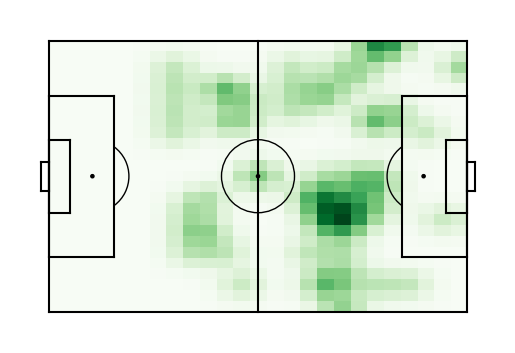

In [16]:
plot_heatmap(firmino, cmap = 'Greens')

In [17]:
firmino['type'].unique()
defensive_actions = ['interception', 'tackle']
offensive_actions = ['shot', 'pass', 'dribble', 'cross', 'take_on']

firmino_defensive = firmino[firmino['type'].apply(lambda x: x in defensive_actions)]
firmino_offensive = firmino[firmino['type'].apply(lambda x: x in offensive_actions)]

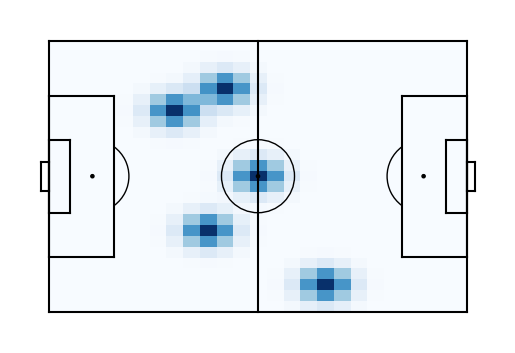

In [18]:
plot_heatmap(firmino_defensive)

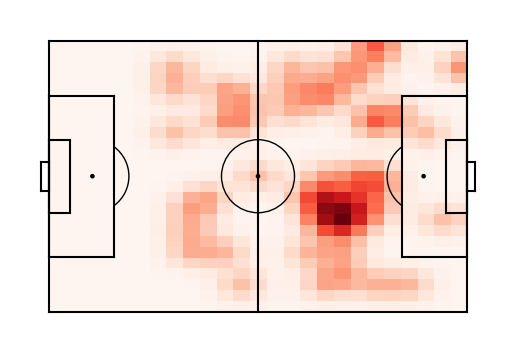

In [19]:
plot_heatmap(firmino_offensive, cmap = 'Reds')

### Analisando Resultados
- Analisando os mapas de calor do jogador, é possível perceber que ele teve uma atuação muito mais ofensiva do que defensiva, o que é esperado de um atacante. Sua área de atuação está em consenso com a posição que ocupa no Liverpool, de falso 9, ou seja, um atacante que atua mais recuado, buscando a bola e criando jogadas para os companheiros. Para mais, é possível perceber que o jogador teve uma atuação mais centralizada, buscando o centro do campo para criar jogadas.

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

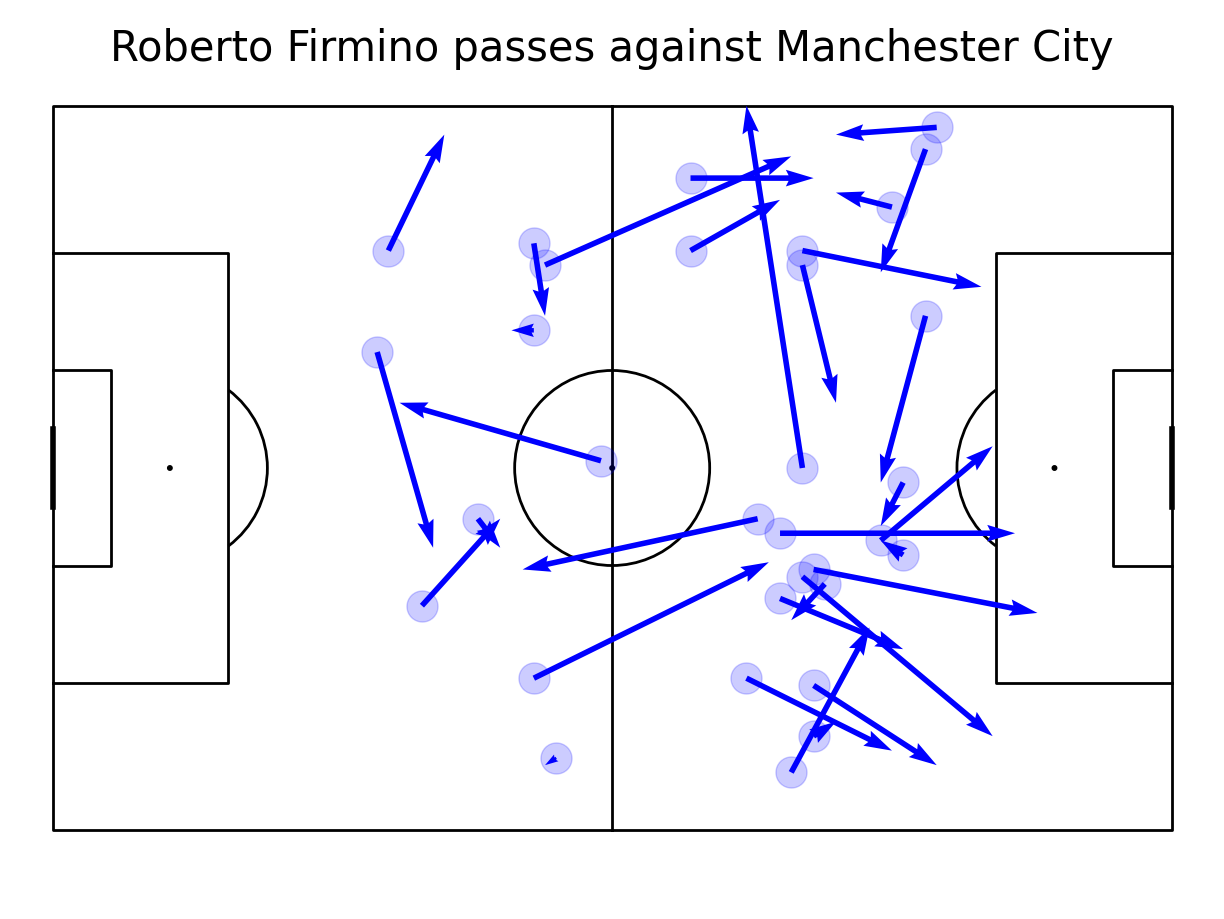

In [20]:
mask_firmino = firmino.loc[firmino['type'] == 'pass'] 
df_pass = mask_firmino.loc[:, ['start_x', 'start_y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

pitch.arrows(df_pass.start_x, df_pass.start_y, df_pass.end_x,
            df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.start_x, df_pass.start_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Roberto Firmino passes against Manchester City", fontsize = 30)
plt.show()


### Analisando Resultados
- O mapa de passes está em conformidade com os de calor apresentado pelo jogador. Aqui fica clara a participação de Firmino no ataque, com passes para o meio e para a área adversária. A localização do jogador e distribuição dos toques confirmam a ideia de sua função conhecida como "falso 9", isto é, um centroavante que busca o jogo na entrada da área, tem boa movimentação e assiste bem os companheiros. Além disso, é evidente que o atacante do Liverpool também participou na parte de trás do campo, com passes para a defesa e para o meio. O mapa de passes, portanto, mostra que o jogador atuou ativamente do jogo, tanto no ataque quanto na defesa.

## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

In [74]:
def find_pass_recipient(df: pd.DataFrame, team_id: int):
    df2 = deepcopy(df.loc[df['team_id'] == team_id].reset_index(drop=True))
    for i, row in df2.iterrows():
        if row["type"] == "pass" and row['result'] == "success":
            df2.at[i, "pass_recipient_id"] = df2.loc[i + 1, "player_id"]
        else:
            df2.at[i, "pass_recipient_id"] = np.nan
    return df2

display(find_pass_recipient(final_match_events, 1612).head())

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result,pass_recipient_id
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,pass,foot,success,25393.0
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,1,pass,foot,success,14870.0
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,2,pass,foot,success,25393.0
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,3,pass,foot,success,15175.0
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,4,pass,foot,offside,NaN


In [94]:
def prepare_data(df: pd.DataFrame):
    mask = (df.type == 'pass') & (df.result == 'success')
    #taking necessary columns
    df_pass = df.loc[mask, ['start_x', 'start_y', 'end_x', 'end_y', "player_id", "pass_recipient_id"]]
    #adjusting that only the surname of a player is presented.
    df_pass["player_name"] = df_pass['player_id'].apply(lambda x: players.loc[players['wyId'] == x, 'shortName'].values[0] if len(players.loc[players['wyId'] == x]) > 0 else None)
    df_pass["pass_recipient_name"] = df_pass['pass_recipient_id'].apply(lambda x: players.loc[players['wyId'] == x, 'shortName'].values[0] if x is not None and len(players.loc[players['wyId'] == x]) > 0 else None)
    return df_pass

,start_x,start_y,end_x,end_y,player_id,pass_recipient_id,player_name,pass_recipient_name
0,51.45,34.68,32.55,40.12,15808,25393.0,Roberto Firmino,D. Lovren
1,32.55,40.12,35.70,20.40,25393,14870.0,D. Lovren,J. Matip
2,35.70,20.40,29.40,40.12,14870,25393.0,J. Matip,D. Lovren
3,29.40,40.12,7.35,34.00,25393,15175.0,D. Lovren,L. Karius
6,33.60,12.92,29.40,27.20,18550,14870.0,E. Can,J. Matip


In [82]:
def calculate_vertices(df_pass: pd.DataFrame):
    scatter_df = pd.DataFrame()
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
        recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
        recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

    #adjust the size of a circle so that the player who made more passes
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)
    return scatter_df

In [83]:
def calculate_edges_width(df_pass: pd.DataFrame):    
    #counting passes between players
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #setting a treshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]
    return lines_df

In [84]:
def plot_network(lines_df, scatter_df):
    #plot once again pitch and vertices
    pitch = Pitch(line_color='grey')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

    fig.suptitle("England Passing Network against Sweden", fontsize = 30)
    plt.show()

In [85]:
def plot_passes_network(df: pd.DataFrame, team_id: int):
    df_pass = find_pass_recipient(df, team_id)
    df_pass = prepare_data(df_pass, team_id)
    lines_df = calculate_edges_width(df_pass)
    scatter_df = calculate_vertices(df_pass)
    plot_network(lines_df, scatter_df)
    
plot_passes_network(final_match_events, 1612)

IndexError: index 0 is out of bounds for axis 0 with size 0